In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!wget https://dde.binghamton.edu/download/ImageDB/BOSSbase_1.01.zip

--2024-06-03 16:27:07--  https://dde.binghamton.edu/download/ImageDB/BOSSbase_1.01.zip
Resolving dde.binghamton.edu (dde.binghamton.edu)... 128.226.74.145
Connecting to dde.binghamton.edu (dde.binghamton.edu)|128.226.74.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671626159 (1.6G) [application/x-zip-compressed]
Saving to: ‘BOSSbase_1.01.zip’

BOSSbase_1.01.zip   100%[===================>]   1.56G  28.2MB/s    in 60s     

2024-06-03 16:28:07 (26.6 MB/s) - ‘BOSSbase_1.01.zip’ saved [1671626159/1671626159]



In [4]:
!unzip /content/BOSSbase_1.01.zip

Streaming output truncated to the last 5000 lines.
  inflating: BOSSbase_1.01/5854.pgm  
  inflating: BOSSbase_1.01/1787.pgm  
  inflating: BOSSbase_1.01/2123.pgm  
  inflating: BOSSbase_1.01/7265.pgm  
  inflating: BOSSbase_1.01/4953.pgm  
  inflating: BOSSbase_1.01/4484.pgm  
  inflating: BOSSbase_1.01/7624.pgm  
  inflating: BOSSbase_1.01/8143.pgm  
  inflating: BOSSbase_1.01/2416.pgm  
  inflating: BOSSbase_1.01/1335.pgm  
  inflating: BOSSbase_1.01/9498.pgm  
  inflating: BOSSbase_1.01/1526.pgm  
  inflating: BOSSbase_1.01/7670.pgm  
  inflating: BOSSbase_1.01/914.pgm   
  inflating: BOSSbase_1.01/7314.pgm  
  inflating: BOSSbase_1.01/4787.pgm  
  inflating: BOSSbase_1.01/7190.pgm  
  inflating: BOSSbase_1.01/4448.pgm  
  inflating: BOSSbase_1.01/6431.pgm  
  inflating: BOSSbase_1.01/3482.pgm  
  inflating: BOSSbase_1.01/6612.pgm  
  inflating: BOSSbase_1.01/1835.pgm  
  inflating: BOSSbase_1.01/1080.pgm  
  inflating: BOSSbase_1.01/8246.pgm  
  inflating: BOSSbase_1.01/3403.pgm  

# Applying watermark

In [5]:
!wget https://www.dropbox.com/scl/fi/uc28b6btxpdqjrgt32jay/arial.ttf?rlkey=8trb3rko5jf83m0exkx7ogk4m&st=ddrylotw&dl=0
!mv /content/arial.ttf?rlkey=8trb3rko5jf83m0exkx7ogk4m arial.ttf

--2024-06-03 16:28:37--  https://www.dropbox.com/scl/fi/uc28b6btxpdqjrgt32jay/arial.ttf?rlkey=8trb3rko5jf83m0exkx7ogk4m
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc88476020f6d8ae656d831a57d5.dl.dropboxusercontent.com/cd/0/inline/CUI08_R2OqD_2_vyCHHYuMiKFPUz7mlIrhOksv_nJ5zZGfuCJGteEwPTYOD76oJZtDPL7TTMPb9KfWsjCgJehtP86gNqagzNM4TaJKPGQyH5pcG4PFz6bDXgJg_P1nM3XNr5yOvSTb7JfRNyMqk86hJf/file# [following]
--2024-06-03 16:28:37--  https://uc88476020f6d8ae656d831a57d5.dl.dropboxusercontent.com/cd/0/inline/CUI08_R2OqD_2_vyCHHYuMiKFPUz7mlIrhOksv_nJ5zZGfuCJGteEwPTYOD76oJZtDPL7TTMPb9KfWsjCgJehtP86gNqagzNM4TaJKPGQyH5pcG4PFz6bDXgJg_P1nM3XNr5yOvSTb7JfRNyMqk86hJf/file
Resolving uc88476020f6d8ae656d831a57d5.dl.dropboxusercontent.com (uc88476020f6d8ae656d831a57d5.dl.dropboxusercontent.com)... 162.125.2.15, 2620:1

In [6]:
import os
import shutil

# Path to the original folder containing the files
source_folder = '/content/BOSSbase_1.01'

# Paths to the new folders
watermark_folder = '/content/BOSSbase_1.01/watermark/'
no_watermark_folder = '/content/BOSSbase_1.01/no_watermark/'

os.makedirs(watermark_folder, exist_ok=True)
os.makedirs(no_watermark_folder, exist_ok=True)

# List all files in the original folder
files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]
half_point = len(files) // 2

# Move the first half to the 'watermark' folder
for file in files[:half_point]:
    shutil.move(os.path.join(source_folder, file), watermark_folder)

# Move the second half to the 'no_watermark' folder
for file in files[half_point:]:
    shutil.move(os.path.join(source_folder, file), no_watermark_folder)


In [7]:
import os
from PIL import Image, ImageDraw, ImageFont
import random
from tqdm import tqdm

def apply_random_watermarks(image_path, watermark_text, output_path, spots):
    # Open an image file
    with Image.open(image_path) as img:
        # Make the image editable
        watermark_img = Image.new('RGBA', img.size, (0, 0, 0, 0))
        draw = ImageDraw.Draw(watermark_img)
        width, height = img.size

        for _ in range(spots):
            # Randomly choose a font size, now significantly larger
            font_size = random.randint(width // 30, width // 12)  # Doubled font size range
            font = ImageFont.truetype("arial.ttf", font_size)

            # Calculate text width and height using textbbox
            text_bbox = draw.textbbox((0, 0), watermark_text, font=font)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]

            # Randomly position the watermark ensuring it fits within the image
            x = random.randint(0, width - text_width - 1)
            y = random.randint(0, height - text_height - 1)

            # Draw the text on the watermark image
            draw.text((x, y), watermark_text, font=font, fill=(255, 255, 255, 170))  # Transparency set to about 66%

        # Combine the original image and the watermark image
        img = Image.alpha_composite(img.convert('RGBA'), watermark_img)

        # Save the image
        img.convert('RGB').save(output_path, "JPEG")

# Define your source and output folder paths
source_folder = '/content/BOSSbase_1.01/watermark'
output_folder = '/content/BOSSbase_1.01/with_watermark'
os.makedirs(output_folder, exist_ok=True)

# List of watermark texts
watermarks = ["إبداع", "أمل", "نور", "فكرة", "حلم", "نجاح", "شغف", "مستقبل", "أفق", "تطور"]

# Apply random watermarks to each image in the folder
for file in tqdm(os.listdir(source_folder)):
    file_path = os.path.join(source_folder, file)
    output_path = os.path.join(output_folder, file)
    if os.path.isfile(file_path):
        watermark_text = random.choice(watermarks)
        random_spots = random.randint(1, 3)  # Limit to between 1 and 3 spots
        apply_random_watermarks(file_path, watermark_text, output_path, 4)


100%|██████████| 5000/5000 [03:36<00:00, 23.06it/s]


# Preprocessing

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_images(directory, size=(256,256)):
    images = []
    labels = []  # This might be optional since you have images already paired
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        image = load_img(path, color_mode='grayscale', target_size=size)
        image = img_to_array(image)
        image /= 255.0  # Normalize to [0,1]
        images.append(image)
    return np.array(images)

# Paths to your datasets
watermark_path = '/content/BOSSbase_1.01/with_watermark'
no_watermark_path = '/content/BOSSbase_1.01/watermark'

# Load the datasets
watermarked_images = load_images(watermark_path)
clean_images = load_images(no_watermark_path)


In [9]:
watermarked_images.shape

(5000, 256, 256, 1)

In [10]:
clean_images.shape

(5000, 256, 256, 1)

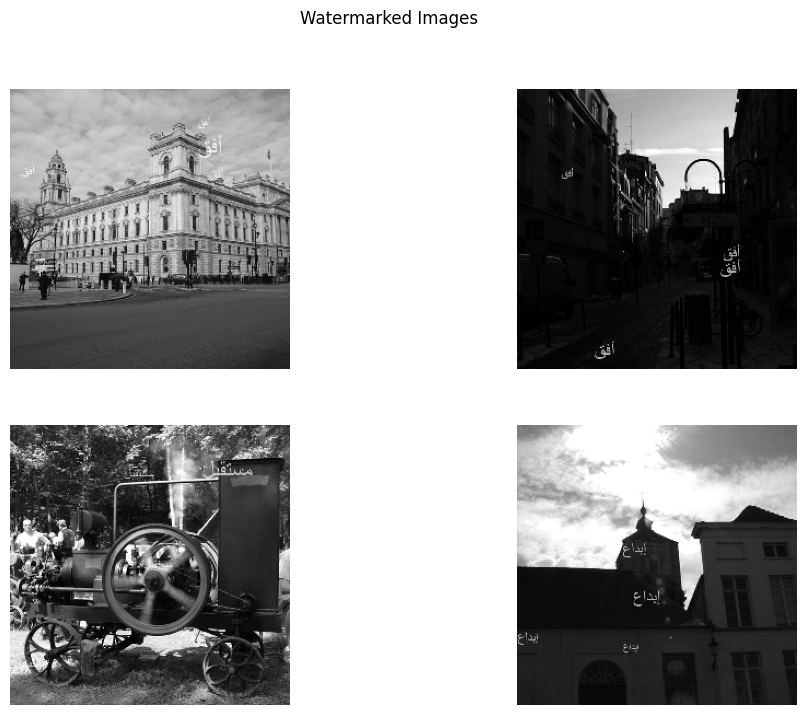

In [11]:
def show_images(images, title=""):
    plt.figure(figsize=(12, 8))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i].reshape(256,256), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(watermarked_images, title="Watermarked Images")

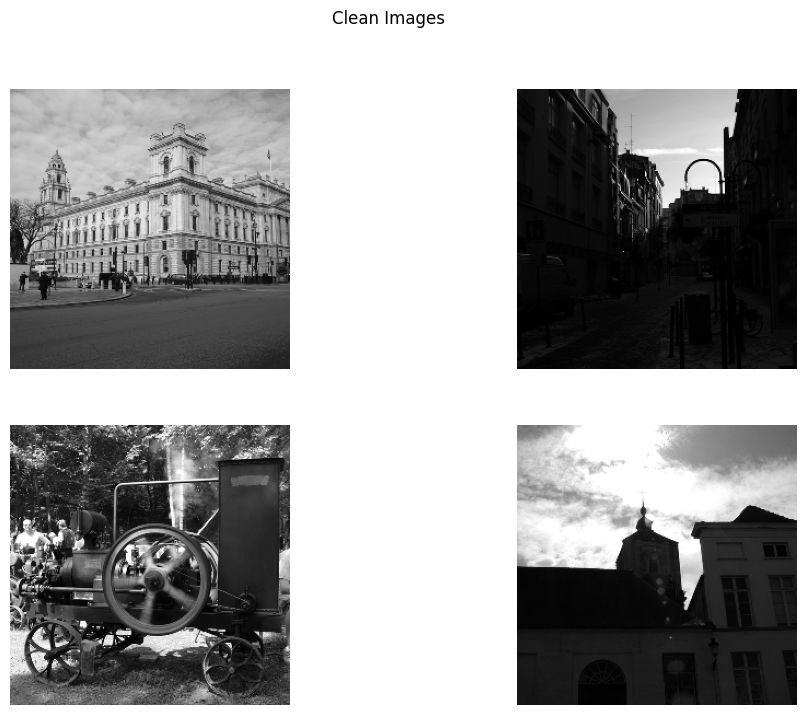

In [12]:
show_images(clean_images, title="Clean Images")

# GAN

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Flatten, Dense, Reshape, Conv2DTranspose, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_generator():
    noise = Input(shape=(256, 256, 1))
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(noise)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(1, (3, 3), padding='same')(x)
    x = Activation('tanh')(x)
    model = Model(inputs=noise, outputs=x)
    return model

def build_discriminator():
    image = Input(shape=(256, 256, 1))
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(image)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=image, outputs=x)
    return model

generator = build_generator()
discriminator = build_discriminator()

In [ ]:
# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

# Generator takes noise as input and generates imgs
z = Input(shape=(256, 256, 1))
img = generator(z)

# For the combined model we will only train the generator
valid = discriminator(img)
combined = Model(z, [valid, img])
combined.compile(loss=['binary_crossentropy', 'mse'], optimizer=Adam(0.0002, 0.5))

In [ ]:
def train(epochs, batch_size=128, save_interval=50):
    for epoch in range(epochs):
        # Sample a batch of images
        idx = np.random.randint(0, watermarked_images.shape[0], batch_size)
        real_imgs = clean_images[idx]
        watermarked_imgs = watermarked_images[idx]

        # Generate a batch of new images
        gen_imgs = generator.predict(watermarked_imgs)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        g_loss = combined.train_on_batch(watermarked_imgs, [np.ones((batch_size, 1)), real_imgs])

        # If at save interval => save generated image samples
        if epoch % save_interval == 0:
            print(f"Epoch {epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

train(epochs=200000, batch_size=32, save_interval=1000)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 22ms/step
Epoch 47000 [D loss: 0.015348488464951515, acc.: 100.0] [G loss: [6.141371726989746, 6.139333724975586, 0.0020380790811032057]]
1/1 [==============================] - 0s 21ms/step
Epoch 48000 [D loss: 0.02681651571765542, acc.: 100.0] [G loss: [5.7245588302612305, 5.723352909088135, 0.0012059869477525353]]
1/1 [==============================] - 0s 22ms/step
Epoch 49000 [D loss: 0.028792187571525574, acc.: 100.0] [G loss: [6.106972694396973, 6.104373931884766, 0.0025989541318267584]]
1/1 [==============================] - 0s 22ms/step
Epoch 50000 [D loss: 0.058004907332360744, acc.: 98.4375] [G loss: [6.085700035095215, 6.08370304107666, 0.001996937207877636]]
1/1 [==============================] - 0s 22ms/step
Epoch 51000 [D loss: 0.022085692267864943, acc.: 100.0] [G loss: [6.772048473358154, 6.770298480987549, 0.0017500094836577773]]
1/1 [==============================] - 0s 21ms/st

KeyboardInterrupt: 

1/1 [==============================] - 0s 22ms/step


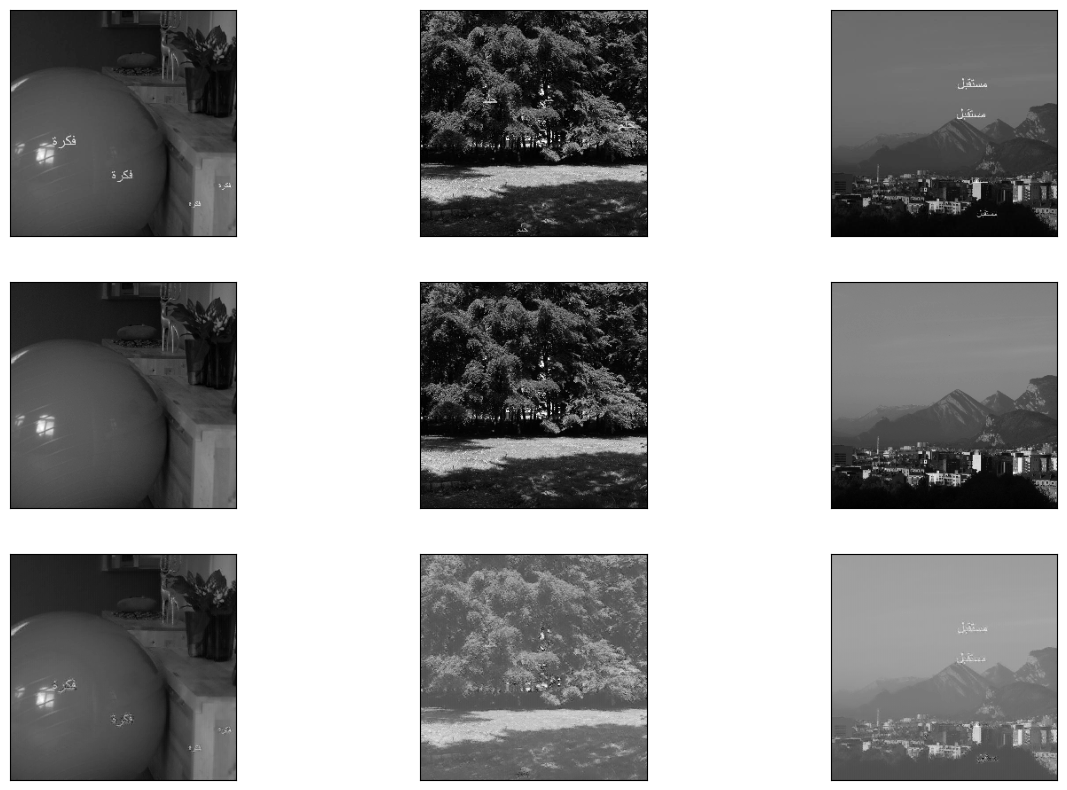

In [ ]:
import matplotlib.pyplot as plt

def plot_comparison(watermarked, clean, generated, n=3):
    plt.figure(figsize=(15, 10))  # increase the figure size
    for i in range(n):
        # Display watermarked image
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(watermarked[i].reshape(256, 256), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display clean image
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(clean[i].reshape(256, 256), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display generated image
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(generated[i].reshape(256, 256), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Select a sample of images to display
idx = np.random.randint(0, watermarked_images.shape[0], 3)  # select only 3 samples
sample_watermarked = watermarked_images[idx]
sample_clean = clean_images[idx]
sample_generated = generator.predict(sample_watermarked)

plot_comparison(sample_watermarked, sample_clean, sample_generated)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio as psnr, structural_similarity as ssim

def calculate_metrics(clean, generated):
    rmse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(clean.shape[0]):
        original = clean[i].reshape(256, 256)
        prediction = generated[i].reshape(256, 256)

        rmse_values.append(np.sqrt(mean_squared_error(original, prediction)))
        psnr_values.append(psnr(original, prediction))
        ssim_values.append(ssim(original, prediction))

    average_rmse = np.mean(rmse_values)
    average_psnr = np.mean(psnr_values)
    average_ssim = np.mean(ssim_values)

    return average_rmse, average_psnr, average_ssim

# Generate predictions for the entire test set
test_watermarked = watermarked_images  # Assuming 'watermarked_images' contains all test images
test_clean = clean_images  # Assuming 'clean_images' contains all original images
test_generated = generator.predict(test_watermarked)

# Calculate metrics for the entire test set
average_rmse, average_psnr, average_ssim = calculate_metrics(test_clean, test_generated)
print("Average RMSE:", average_rmse)
print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)


157/157 [==============================] - 6s 37ms/step
Average RMSE: 0.03831131770340269
Average PSNR: 28.98874417666256
Average SSIM: 0.9291901634926091


157/157 [==============================] - 5s 32ms/step


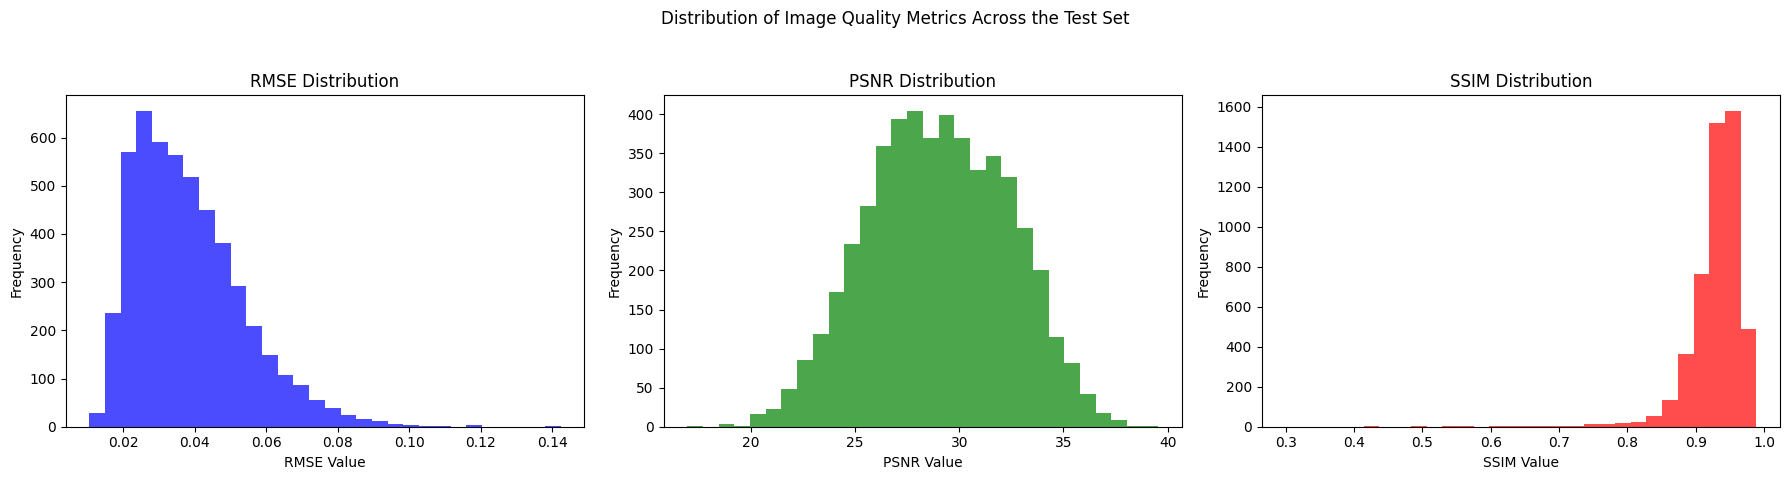

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio as psnr, structural_similarity as ssim

def calculate_metrics(clean, generated):
    rmse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(clean.shape[0]):
        original = clean[i].reshape(256, 256)
        prediction = generated[i].reshape(256, 256)

        rmse_values.append(np.sqrt(mean_squared_error(original, prediction)))
        psnr_values.append(psnr(original, prediction))
        ssim_values.append(ssim(original, prediction))

    return rmse_values, psnr_values, ssim_values

# Generate predictions for the entire test set
test_watermarked = watermarked_images  # Assuming 'watermarked_images' contains all test images
test_clean = clean_images  # Assuming 'clean_images' contains all original images
test_generated = generator.predict(test_watermarked)

# Calculate metrics for the entire test set
rmse_values, psnr_values, ssim_values = calculate_metrics(test_clean, test_generated)

# Plotting histograms for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Image Quality Metrics Across the Test Set')

# RMSE Histogram
axes[0].hist(rmse_values, bins=30, color='blue', alpha=0.7)
axes[0].set_title('RMSE Distribution')
axes[0].set_xlabel('RMSE Value')
axes[0].set_ylabel('Frequency')

# PSNR Histogram
axes[1].hist(psnr_values, bins=30, color='green', alpha=0.7)
axes[1].set_title('PSNR Distribution')
axes[1].set_xlabel('PSNR Value')
axes[1].set_ylabel('Frequency')

# SSIM Histogram
axes[2].hist(ssim_values, bins=30, color='red', alpha=0.7)
axes[2].set_title('SSIM Distribution')
axes[2].set_xlabel('SSIM Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Attention mechanism

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Flatten, Dense, Reshape, Conv2DTranspose, Activation, Dropout, Layer, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Define the custom SelfAttention layer
class SelfAttention(Layer):
    def __init__(self, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.query = Dense(input_shape[-1])
        self.key = Dense(input_shape[-1])
        self.value = Dense(input_shape[-1])
        super(SelfAttention, self).build(input_shape)

    def call(self, inputs):
        q = self.query(inputs)
        k = self.key(inputs)
        v = self.value(inputs)

        attention = tf.matmul(q, k, transpose_b=True)
        attention = tf.nn.softmax(attention, axis=-1)
        attended = tf.matmul(attention, v)

        return attended + inputs  # Skip connection

    def compute_output_shape(self, input_shape):
        return input_shape

In [11]:
def build_generator():
    noise = Input(shape=(256, 256, 3))
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(noise)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)

    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)

    x = SelfAttention()(x)  # Add attention

    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)

    x = Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)

    x = Conv2D(3, (3, 3), padding='same')(x)  # Output layer adjusted to output RGB images
    x = Activation('tanh')(x)
    model = Model(inputs=noise, outputs=x)
    return model

In [12]:
def build_discriminator():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    # Freeze the pre-trained layers
    for layer in base_model.layers:
        layer.trainable = False

    image_input = Input(shape=(256, 256, 3))
    x = base_model(image_input)
    x = SelfAttention()(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=image_input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [14]:
# Create the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

# Generator takes noise as input and generates imgs
z = Input(shape=(256, 256, 3))
img = generator(z)

# For the combined model, we will only train the generator
valid = discriminator(img)
combined = Model(z, [valid, img])
combined.compile(loss=['binary_crossentropy', 'mse'], optimizer=Adam(0.0002, 0.5))

In [15]:
import numpy as np

def preprocess_images(images):
    if images.shape[-1] == 1:  # Check if the images are grayscale
        images = np.concatenate([images, images, images], axis=-1)  # Convert grayscale to RGB by duplicating channels
    return images

def train(epochs, batch_size=128, save_interval=50):
    for epoch in range(epochs):
        # Sample a batch of images
        idx = np.random.randint(0, watermarked_images.shape[0], batch_size)
        real_imgs = preprocess_images(clean_images[idx])
        watermarked_imgs = preprocess_images(watermarked_images[idx])

        # Generate a batch of new images
        gen_imgs = generator.predict(watermarked_imgs)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        g_loss = combined.train_on_batch(watermarked_imgs, [np.ones((batch_size, 1)), real_imgs])

        # If at save interval => save generated image samples
        if epoch % save_interval == 0:
            print(f"Epoch {epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

train(epochs=10000, batch_size=32, save_interval=100)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 31ms/step
Epoch 5100 [D loss: 0.14798536524176598, acc.: 93.75] [G loss: [8.286031723022461, 8.260478973388672, 0.02555253356695175]]
1/1 [==============================] - 0s 33ms/step
Epoch 5200 [D loss: 0.06480209529399872, acc.: 100.0] [G loss: [10.730391502380371, 10.702649116516113, 0.02774229273200035]]
1/1 [==============================] - 0s 30ms/step
Epoch 5300 [D loss: 0.11218388378620148, acc.: 93.75] [G loss: [5.8270134925842285, 5.793867111206055, 0.033146247267723083]]
1/1 [==============================] - 0s 30ms/step
Epoch 5400 [D loss: 0.02605554275214672, acc.: 98.4375] [G loss: [12.14592456817627, 12.11821174621582, 0.02771289460361004]]
1/1 [==============================] - 0s 29ms/step
Epoch 5500 [D loss: 0.12270626425743103, acc.: 95.3125] [G loss: [4.9379119873046875, 4.908025741577148, 0.02988637611269951]]
1/1 [==============================] - 0s 30ms/step
Epoch 56

In [18]:
# Save the trained models
generator.save('generator_model.h5')
discriminator.save('discriminator_model.h5')
combined.save('combined_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
from tensorflow.keras.models import load_model

# Load the generator model
generator_loaded = load_model('generator_model.h5', custom_objects={'SelfAttention': SelfAttention})

# Load the discriminator model
discriminator_loaded = load_model('discriminator_model.h5', custom_objects={'SelfAttention': SelfAttention})

# Load the combined model if you saved it
combined_loaded = load_model('combined_model.h5', custom_objects={'SelfAttention': SelfAttention})


In [15]:
from tensorflow.keras.models import load_model

generator_loaded = load_model('/content/drive/MyDrive/GAN_AR/generator_model.h5', custom_objects={'SelfAttention': SelfAttention})


1/1 [==============================] - 0s 30ms/step


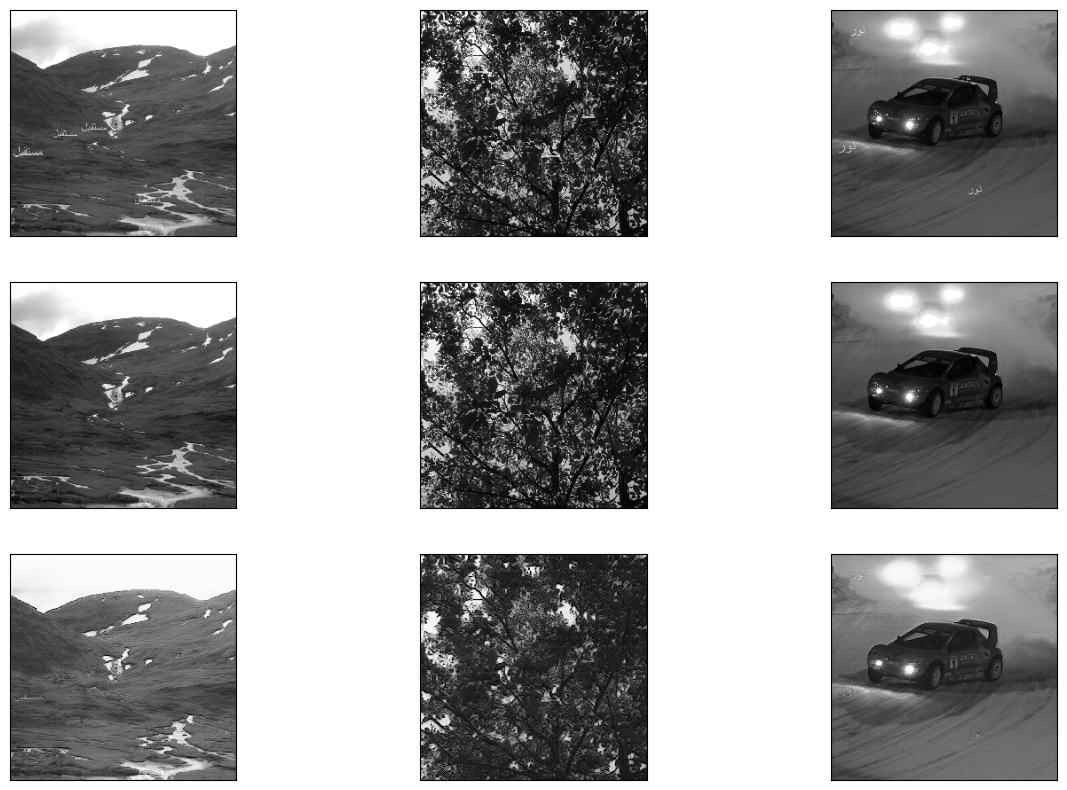

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def convert_to_three_channels(images):
    return np.repeat(images, 3, axis=-1)

def convert_to_black_and_white(images):
    # Convert to grayscale
    gray_images = np.dot(images[..., :3], [0.299, 0.587, 0.114])
    # Expand grayscale to 3 channels
    bw_images = np.repeat(gray_images[..., np.newaxis], 3, axis=-1)
    return bw_images

def plot_comparison(watermarked, clean, generated, n=3):
    plt.figure(figsize=(15, 10))  # increase the figure size
    for i in range(n):
        # Display watermarked image
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(watermarked[i].reshape(256, 256, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display clean image
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(clean[i].reshape(256, 256), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display generated image (converted to black and white)
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(convert_to_black_and_white(generated[i].reshape(256, 256, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Convert watermarked images to three channels
watermarked_images_3ch = convert_to_three_channels(watermarked_images)

# Select a sample of images to display
idx = np.random.randint(0, watermarked_images.shape[0], 3)  # select only 3 samples
sample_watermarked = watermarked_images_3ch[idx]
sample_clean = clean_images[idx]
sample_generated = generator_loaded.predict(sample_watermarked)

plot_comparison(sample_watermarked, sample_clean, sample_generated)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio as psnr, structural_similarity as ssim

def convert_to_three_channels(images):
    return np.repeat(images, 3, axis=-1)

def calculate_metrics(clean, generated):
    rmse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(clean.shape[0]):
        original = clean[i].reshape(256, 256)
        prediction = generated[i].reshape(256, 256, 3)

        # Convert the predicted image to grayscale
        prediction_gray = np.dot(prediction[..., :3], [0.299, 0.587, 0.114])

        rmse_values.append(np.sqrt(mean_squared_error(original, prediction_gray)))
        psnr_values.append(psnr(original, prediction_gray))
        ssim_values.append(ssim(original, prediction_gray))

    average_rmse = np.mean(rmse_values)
    average_psnr = np.mean(psnr_values)
    average_ssim = np.mean(ssim_values)

    return average_rmse, average_psnr, average_ssim

# Generate predictions for the entire test set
test_watermarked = convert_to_three_channels(watermarked_images)  # Assuming 'watermarked_images' contains all test images
test_clean = clean_images  # Assuming 'clean_images' contains all original images
test_generated = generator_loaded.predict(test_watermarked)

# Calculate metrics for the entire test set
average_rmse, average_psnr, average_ssim = calculate_metrics(test_clean, test_generated)
print("Average RMSE:", average_rmse)
print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)


157/157 [==============================] - 58s 324ms/step


<ipython-input-17-c9aabbd89b45>:21: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_values.append(psnr(original, prediction_gray))
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


Average RMSE: 0.1168994831210784
Average PSNR: 18.66560106821083
Average SSIM: 0.515607514856597


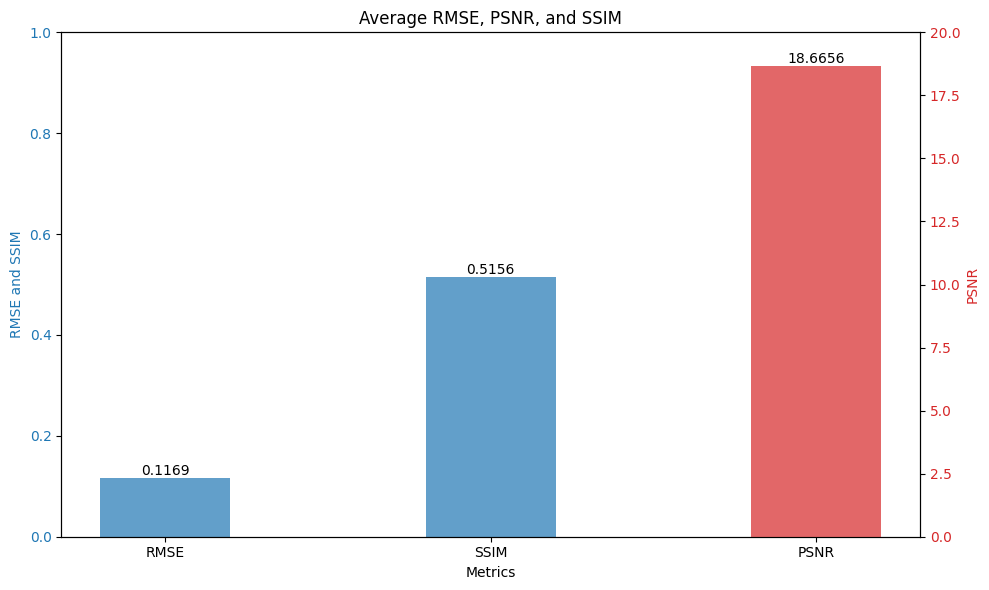

In [21]:
# Metrics and their values
metrics = ['RMSE', 'SSIM']
values_left = [average_rmse, average_ssim]
values_right = [average_psnr]

# Plotting the bar plot with RMSE and SSIM on the left y-axis and PSNR on the right y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RMSE and SSIM on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Metrics')
ax1.set_ylabel('RMSE and SSIM', color=color)
bars1 = ax1.bar([0, 1], values_left, color=color, alpha=0.7, width=0.4, label=['RMSE', 'SSIM'])
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['RMSE', 'SSIM', 'PSNR'])
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)  # Setting y-axis limit for RMSE and SSIM

# Adding the exact values on top of RMSE and SSIM bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 4), va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

# Create another y-axis for PSNR on the right
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('PSNR', color=color)
bars2 = ax2.bar(2, values_right, color=color, alpha=0.7, width=0.4, label='PSNR')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 20)  # Setting y-axis limit for PSNR

# Adding the exact value on top of the PSNR bar
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 4), va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

# Title and layout adjustments
plt.title('Average RMSE, PSNR, and SSIM')
fig.tight_layout()  # To ensure everything fits without overlapping

# Show the plot
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio as psnr, structural_similarity as ssim

def calculate_metrics(clean, generated):
    rmse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(clean.shape[0]):
        original = clean[i].reshape(256, 256)

        # Convert the generated image to grayscale
        prediction = np.mean(generated[i], axis=2).reshape(256, 256)

        rmse_values.append(np.sqrt(mean_squared_error(original, prediction)))
        psnr_values.append(psnr(original, prediction))
        ssim_values.append(ssim(original, prediction))

    return rmse_values, psnr_values, ssim_values

# Calculate metrics for the entire test set
rmse_values, psnr_values, ssim_values = calculate_metrics(test_clean, test_generated)


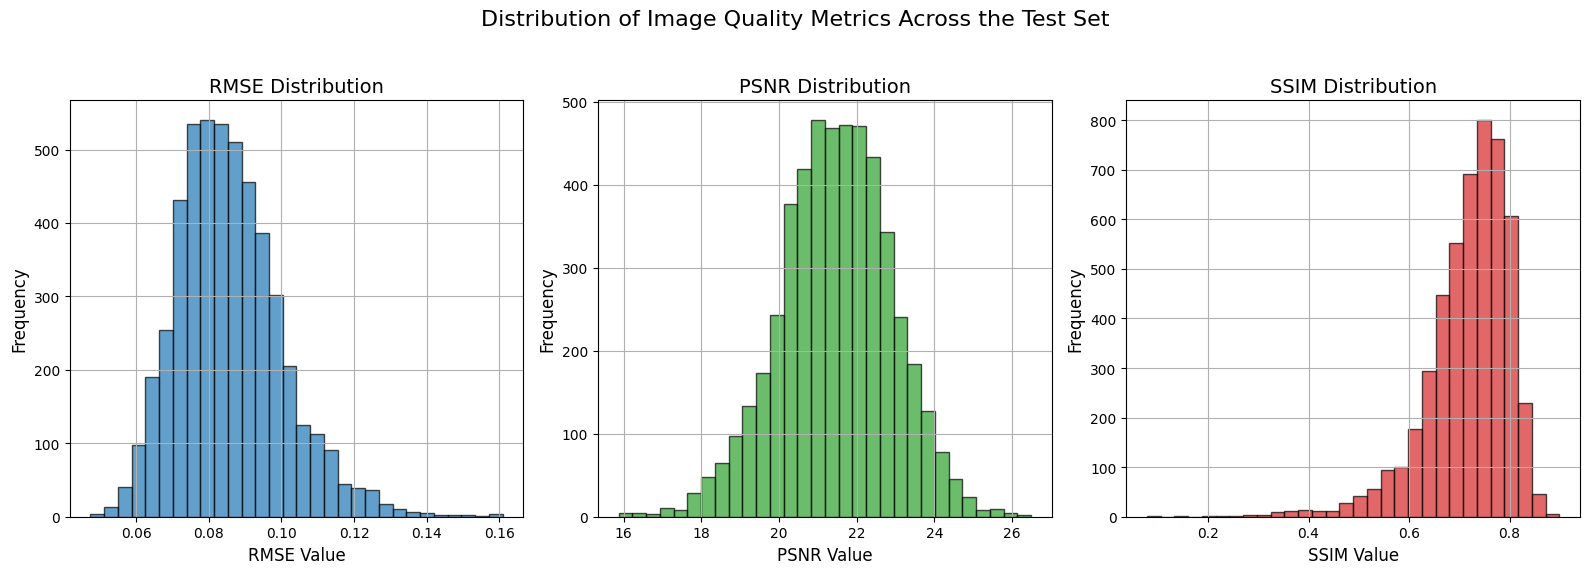

In [14]:
import matplotlib.pyplot as plt

# Assuming rmse_values, psnr_values, and ssim_values are already calculated
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Distribution of Image Quality Metrics Across the Test Set', fontsize=16)

# Define colors
colors = ['#1f77b4', '#2ca02c', '#d62728']

# RMSE Histogram
axes[0].hist(rmse_values, bins=30, color=colors[0], alpha=0.7, edgecolor='black')
axes[0].set_title('RMSE Distribution', fontsize=14)
axes[0].set_xlabel('RMSE Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True)

# PSNR Histogram
axes[1].hist(psnr_values, bins=30, color=colors[1], alpha=0.7, edgecolor='black')
axes[1].set_title('PSNR Distribution', fontsize=14)
axes[1].set_xlabel('PSNR Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(True)

# SSIM Histogram
axes[2].hist(ssim_values, bins=30, color=colors[2], alpha=0.7, edgecolor='black')
axes[2].set_title('SSIM Distribution', fontsize=14)
axes[2].set_xlabel('SSIM Value', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


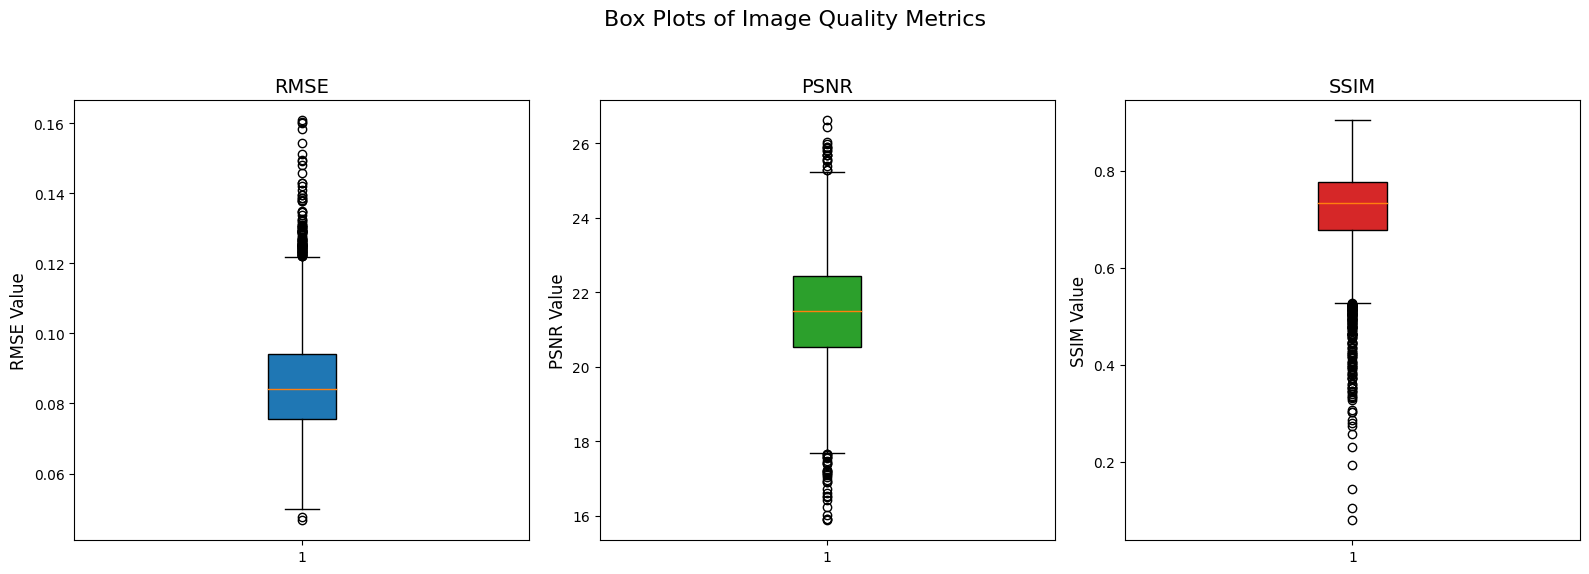

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Box Plots of Image Quality Metrics', fontsize=16)

colors = ['#1f77b4', '#2ca02c', '#d62728']


axes[0].boxplot(rmse_values, patch_artist=True, boxprops=dict(facecolor=colors[0]))
axes[0].set_title('RMSE', fontsize=14)
axes[0].set_ylabel('RMSE Value', fontsize=12)

axes[1].boxplot(psnr_values, patch_artist=True, boxprops=dict(facecolor=colors[1]))
axes[1].set_title('PSNR', fontsize=14)
axes[1].set_ylabel('PSNR Value', fontsize=12)

axes[2].boxplot(ssim_values, patch_artist=True, boxprops=dict(facecolor=colors[2]))
axes[2].set_title('SSIM', fontsize=14)
axes[2].set_ylabel('SSIM Value', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


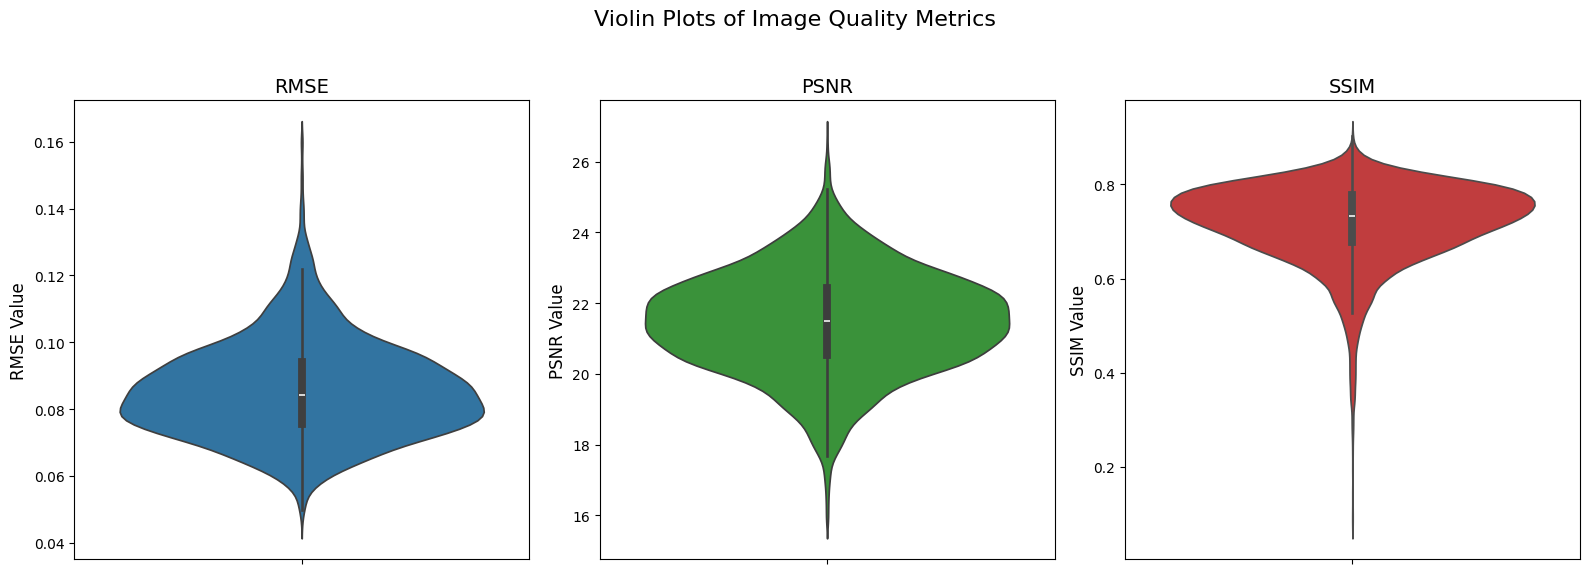

In [25]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Violin Plots of Image Quality Metrics', fontsize=16)

sns.violinplot(ax=axes[0], data=rmse_values, color=colors[0])
axes[0].set_title('RMSE', fontsize=14)
axes[0].set_ylabel('RMSE Value', fontsize=12)

sns.violinplot(ax=axes[1], data=psnr_values, color=colors[1])
axes[1].set_title('PSNR', fontsize=14)
axes[1].set_ylabel('PSNR Value', fontsize=12)

sns.violinplot(ax=axes[2], data=ssim_values, color=colors[2])
axes[2].set_title('SSIM', fontsize=14)
axes[2].set_ylabel('SSIM Value', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


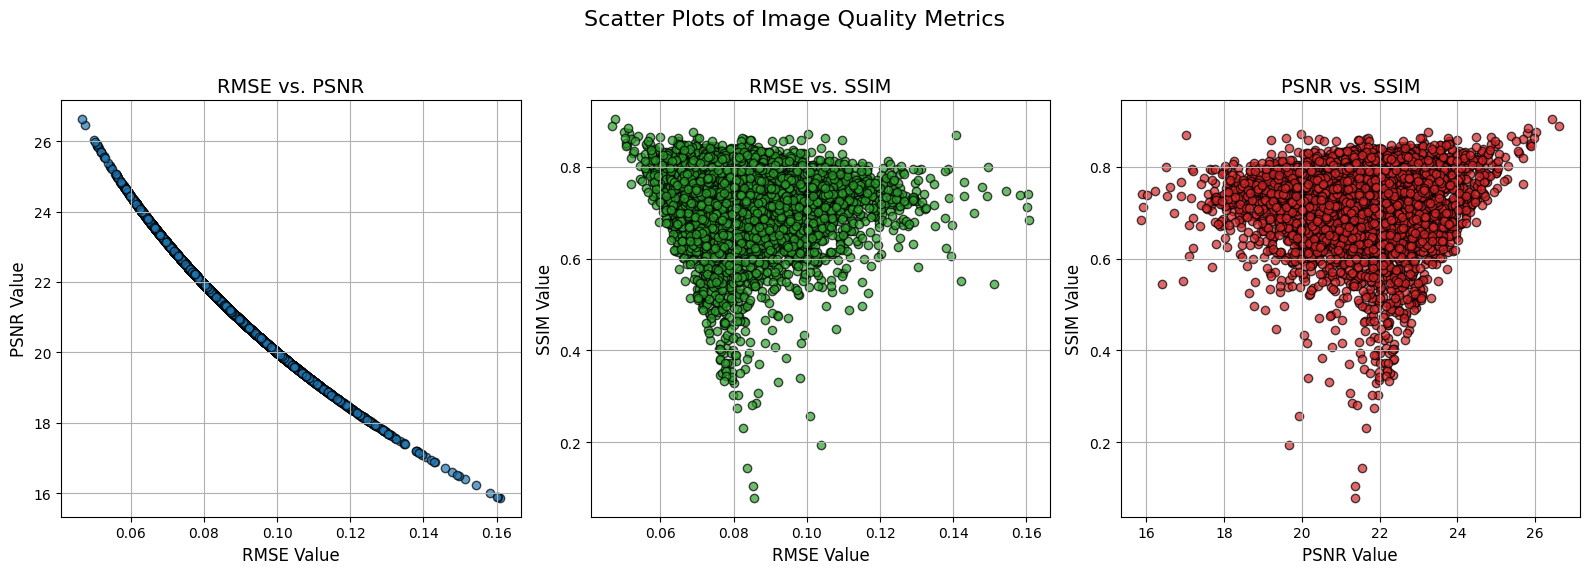

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Scatter Plots of Image Quality Metrics', fontsize=16)

axes[0].scatter(rmse_values, psnr_values, color=colors[0], alpha=0.7, edgecolor='black')
axes[0].set_title('RMSE vs. PSNR', fontsize=14)
axes[0].set_xlabel('RMSE Value', fontsize=12)
axes[0].set_ylabel('PSNR Value', fontsize=12)
axes[0].grid(True)

axes[1].scatter(rmse_values, ssim_values, color=colors[1], alpha=0.7, edgecolor='black')
axes[1].set_title('RMSE vs. SSIM', fontsize=14)
axes[1].set_xlabel('RMSE Value', fontsize=12)
axes[1].set_ylabel('SSIM Value', fontsize=12)
axes[1].grid(True)

axes[2].scatter(psnr_values, ssim_values, color=colors[2], alpha=0.7, edgecolor='black')
axes[2].set_title('PSNR vs. SSIM', fontsize=14)
axes[2].set_xlabel('PSNR Value', fontsize=12)
axes[2].set_ylabel('SSIM Value', fontsize=12)
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


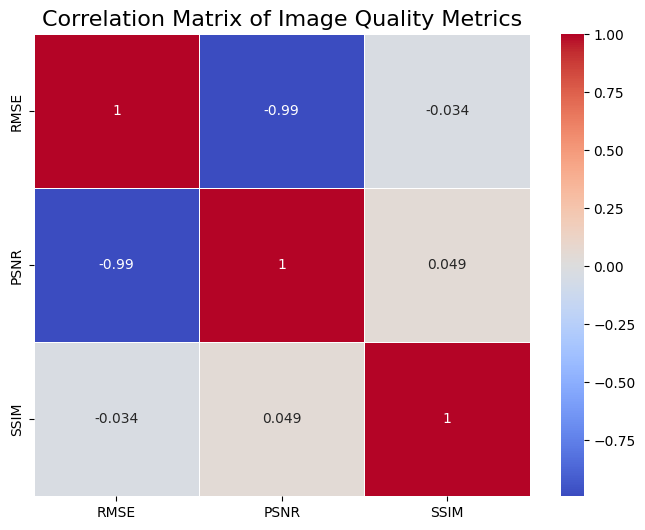

In [27]:
import seaborn as sns
import pandas as pd

data = {'RMSE': rmse_values, 'PSNR': psnr_values, 'SSIM': ssim_values}
df = pd.DataFrame(data)

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Image Quality Metrics', fontsize=16)
plt.show()


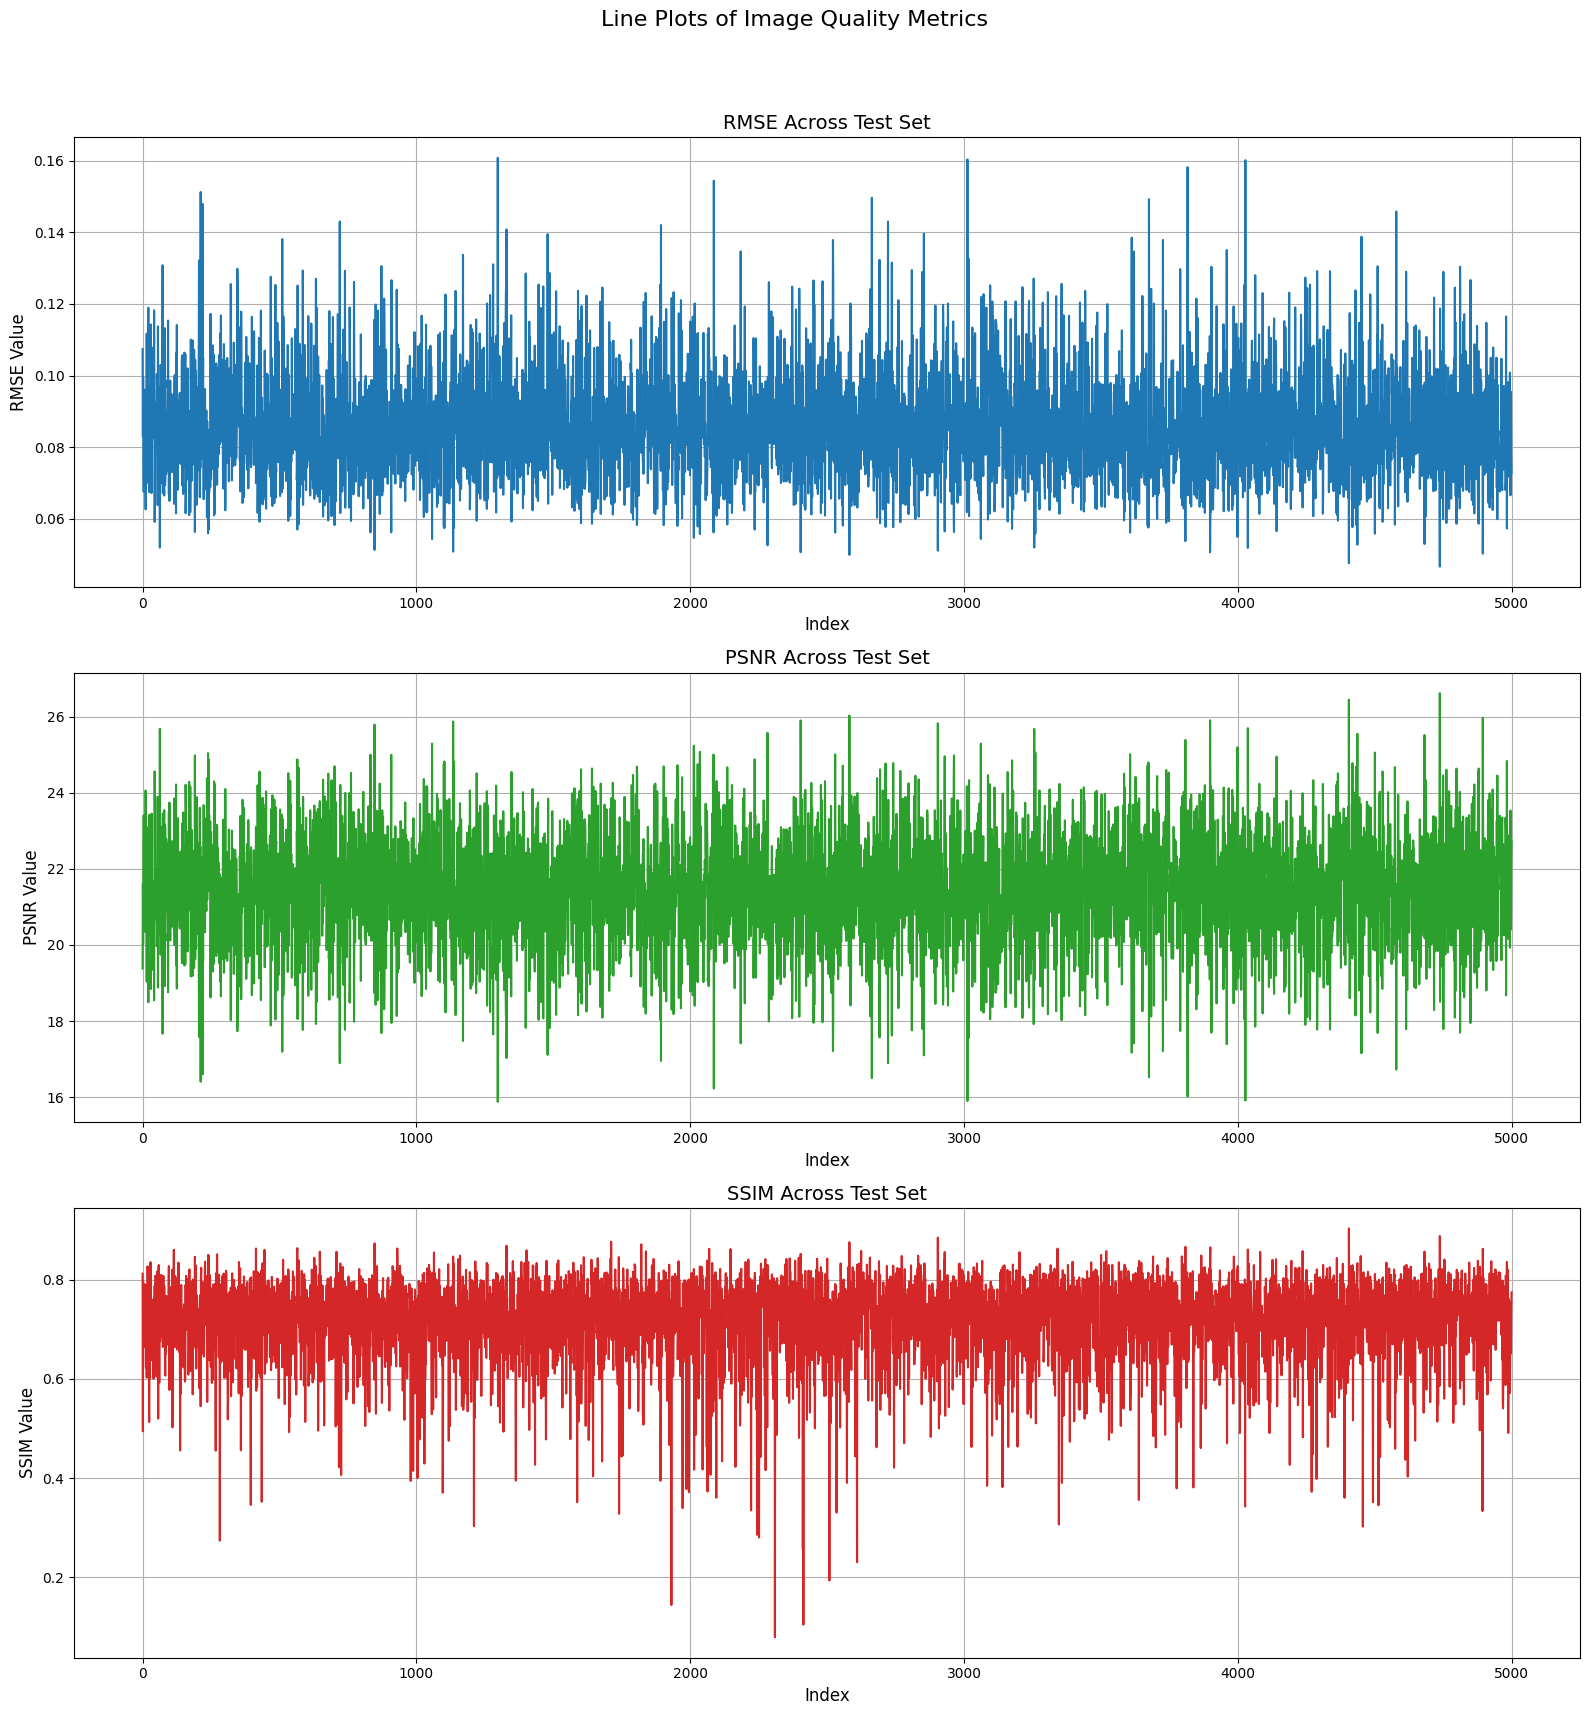

In [28]:
fig, axes = plt.subplots(3, 1, figsize=(16, 18))
fig.suptitle('Line Plots of Image Quality Metrics', fontsize=16)

axes[0].plot(rmse_values, color=colors[0])
axes[0].set_title('RMSE Across Test Set', fontsize=14)
axes[0].set_xlabel('Index', fontsize=12)
axes[0].set_ylabel('RMSE Value', fontsize=12)
axes[0].grid(True)

axes[1].plot(psnr_values, color=colors[1])
axes[1].set_title('PSNR Across Test Set', fontsize=14)
axes[1].set_xlabel('Index', fontsize=12)
axes[1].set_ylabel('PSNR Value', fontsize=12)
axes[1].grid(True)

axes[2].plot(ssim_values, color=colors[2])
axes[2].set_title('SSIM Across Test Set', fontsize=14)
axes[2].set_xlabel('Index', fontsize=12)
axes[2].set_ylabel('SSIM Value', fontsize=12)
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [17]:
!mkdir /content/drive/MyDrive/GAN_AR

In [18]:
!cp /content/combined_model.h5 /content/drive/MyDrive/GAN_AR/

In [19]:
!cp /content/discriminator_model.h5 /content/drive/MyDrive/GAN_AR/

In [20]:
!cp /content/generator_model.h5 /content/drive/MyDrive/GAN_AR/